# Regularized regression: US county-level sociodemographic and health resource data (2018-2019)

## 1. Import modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
pd.set_option('display.max_rows', 250)

### 1.1. Data download

In [2]:
data_url='https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
data_df=pd.read_csv(data_url, sep=',')

### 1.2. Data inspection

In [3]:
data_df.head().T

,0,1,2,3,4
fips,1001,1003,1005,1007,1009
TOT_POP,55601,218022,24881,22400,57840
0-9,6787,24757,2732,2456,7095
0-9 y/o % of total pop,12.206615,11.355276,10.980266,10.964286,12.266598
19-Oct,7637,26913,2960,2596,7570
10-19 y/o % of total pop,13.735364,12.344167,11.896628,11.589286,13.087828
20-29,6878,23579,3268,3029,6742
20-29 y/o % of total pop,12.370281,10.814964,13.13452,13.522321,11.656293
30-39,7089,25213,3201,3113,6884
30-39 y/o % of total pop,12.749771,11.564429,12.865239,13.897321,11.901798


In [4]:
data_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Non-Null Count  Dtype  
---   ------                                                                         --------------  -----  
 0    fips                                                                           3140 non-null   int64  
 1    TOT_POP                                                                        3140 non-null   int64  
 2    0-9                                                                            3140 non-null   int64  
 3    0-9 y/o % of total pop                                                         3140 non-null   float64
 4    19-Oct                                                                         3140 non-null   int64  
 5    10-19 y/o % of total pop                                                       3140 non-null   float64
 6    20-29         

### 1.3. Train-test split 

In [5]:
training_df, testing_df=train_test_split(data_df,test_size=0.25,random_state=315)

## 2. EDA
### 2.1. Baseline model performance 

In [6]:
accuracy = training_df['anycondition_number']/training_df['TOT_POP']
#print(accuracy)
accuracy_mean=np.mean(accuracy)
print(f"Accuracy of any condition rate: {accuracy_mean:.2f}")

rmse=root_mean_squared_error(accuracy, [accuracy_mean]*len(training_df))
print(f"RMSE of the any condition rate model: {rmse:.2f}")


Accuracy of any condition rate: 0.36
RMSE of the any condition rate model: 0.05


### 2.2. Feature selection 

#### 2.2.1. Excluding features related to pathology data

In [7]:
train_labels=training_df['anycondition_number']/training_df['TOT_POP']
test_labels=testing_df['anycondition_number']/testing_df['TOT_POP']

no_path_features=training_df.columns[:83]
#print(no_path_features)
training_df=training_df[no_path_features]
testing_df=testing_df[no_path_features]
training_df.head().T

,340,1171,2303,967,872
fips,12047,22121,42123,20163,19171
TOT_POP,14310,26427,39498,5013,16904
0-9,1484,3621,4072,614,2155
0-9 y/o % of total pop,10.37037,13.701896,10.309383,12.248155,12.748462
19-Oct,1560,3371,4328,605,2324
10-19 y/o % of total pop,10.901468,12.755894,10.957517,12.068622,13.748225
20-29,2422,3542,4078,519,1813
20-29 y/o % of total pop,16.925227,13.402959,10.324573,10.353082,10.725272
30-39,1678,4098,4139,551,1787
30-39 y/o % of total pop,11.726066,15.506868,10.479012,10.991422,10.571462


In [8]:
training_df['COUNTY_NAME'].value_counts()

COUNTY_NAME
Washington        23
Jackson           18
Lincoln           18
Jefferson         17
Madison           16
                  ..
Utah               1
Virginia Beach     1
Goochland          1
Wyandotte          1
Alcona             1
Name: count, Length: 1480, dtype: int64

#### 2.2.2. Filtering features 

In [9]:
#1. Encoding the categorical features
categorical_features=['COUNTY_NAME', 'STATE_NAME']
#print(training_df[categorical_features])
ordinal_encoder=OrdinalEncoder()
training_df[categorical_features]=ordinal_encoder.fit_transform(training_df[categorical_features])
#print(training_df[categorical_features])

#2. Recursive Feature Elimination - selects top 21 features
#removes the least important features one step at a time
linear_reg_model=LinearRegression()
selector=RFE(linear_reg_model, n_features_to_select=21, step=1)
selector=selector.fit(training_df, train_labels)

#3. Select important features 
#.get_support() returns boolean mask on which features were selected by RFE 
training_features=training_df.loc[:, selector.get_support()].copy()
testing_features=testing_df.loc[:, selector.get_support()].copy()

training_features.head().transpose()

,340,1171,2303,967,872
0-9 y/o % of total pop,10.370370,13.701896,10.309383,12.248155,12.748462
10-19 y/o % of total pop,10.901468,12.755894,10.957517,12.068622,13.748225
20-29 y/o % of total pop,16.925227,13.402959,10.324573,10.353082,10.725272
30-39 y/o % of total pop,11.726066,15.506868,10.479012,10.991422,10.571462
40-49 y/o % of total pop,12.096436,11.109850,11.119550,10.572511,10.955987
50-59 y/o % of total pop,13.214535,13.497559,15.448883,13.764213,13.961193
60-69 y/o % of total pop,12.550664,11.174178,15.524837,14.103331,13.541174
70-79 y/o % of total pop,8.266946,5.687365,9.891640,9.136246,7.856129
80+ y/o % of total pop,3.948288,3.163431,5.944605,6.762418,5.892097
% White-alone,62.948987,57.944526,97.713808,95.930580,87.245622


In [10]:
testing_features.head().T

,2808,2126,2043,525,644
0-9 y/o % of total pop,9.568,11.865558,11.904363,12.933718,10.525085
10-19 y/o % of total pop,9.840,13.161613,14.125965,13.978925,11.182538
20-29 y/o % of total pop,8.784,11.504184,13.085868,14.171688,11.875055
30-39 y/o % of total pop,9.056,11.729703,10.962880,12.929434,12.514975
40-49 y/o % of total pop,11.600,11.642756,11.163829,12.092698,12.260760
50-59 y/o % of total pop,16.112,13.935985,12.981673,12.979410,14.706484
60-69 y/o % of total pop,17.296,13.109988,12.935157,10.968958,13.452941
70-79 y/o % of total pop,11.984,8.148571,8.103079,6.471143,8.225462
80+ y/o % of total pop,5.760,4.901641,4.737185,3.474027,5.256699
% White-alone,96.336,96.614498,96.749465,58.954222,91.660579


#### 2.2.3. Feature renaming (removing long column names)

In [11]:
rename_columns={'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)': 'Primary physicians',
                'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)': 'General surgons'}

training_features.rename(columns=rename_columns, inplace=True)
testing_features.rename(columns=rename_columns, inplace=True)

In [12]:
testing_features.T

,2808,2126,2043,525,644,3062,2338,3060,2073,553,...,482,1001,2725,758,2994,241,2910,1698,106,1656
0-9 y/o % of total pop,9.568,11.865558,11.904363,12.933718,10.525085,11.371420,11.100202,10.504999,12.554003,12.215478,...,10.585559,10.677741,14.572526,11.350637,8.886187,15.926244,10.622961,13.079777,14.228892,11.554622
10-19 y/o % of total pop,9.840,13.161613,14.125965,13.978925,11.182538,13.207186,12.304274,11.754768,14.958704,12.204639,...,12.776913,13.016611,14.745938,13.391983,11.629059,14.075934,11.664737,13.110699,15.525360,9.873950
20-29 y/o % of total pop,8.784,11.504184,13.085868,14.171688,11.875055,18.991907,12.955403,12.250046,16.248412,9.473228,...,10.681356,14.614618,12.699386,12.396665,12.007386,15.074128,13.803536,9.632035,12.375567,13.235294
30-39 y/o % of total pop,9.056,11.729703,10.962880,12.929434,12.514975,13.005338,12.790037,12.817071,10.346252,9.798396,...,10.142498,11.176080,13.515614,12.933830,9.584290,14.642303,12.356624,10.822511,10.692094,7.773109
40-49 y/o % of total pop,11.600,11.642756,11.163829,12.092698,12.260760,10.396617,12.102734,11.775597,11.362770,10.481249,...,11.866842,12.315615,12.037134,12.931472,11.867766,10.837893,13.006419,11.301793,11.025349,8.193277
50-59 y/o % of total pop,16.112,13.935985,12.981673,12.979410,14.706484,11.572311,13.487675,14.501944,12.337992,14.350748,...,16.069932,12.720930,11.923520,13.567697,14.317885,11.238964,13.224771,13.620903,11.883210,16.386555
60-69 y/o % of total pop,17.296,13.109988,12.935157,10.968958,13.452941,11.092085,12.976074,14.330680,11.334180,16.572729,...,14.165968,12.245847,10.279102,12.774037,15.808675,10.035750,13.543092,13.110699,11.775709,16.596639
70-79 y/o % of total pop,11.984,8.148571,8.103079,6.471143,8.225462,6.554805,8.226965,7.713849,7.020330,10.752222,...,9.807209,8.093023,6.908047,7.002606,9.832005,5.553491,7.910660,8.967223,8.402313,10.294118
80+ y/o % of total pop,5.760,4.901641,4.737185,3.474027,5.256699,3.808330,4.056638,4.351046,3.837357,4.151312,...,3.903724,5.139535,3.318733,3.651073,6.066748,2.615292,3.867200,6.354360,4.091505,6.092437
% White-alone,96.336,96.614498,96.749465,58.954222,91.660579,91.756749,43.827192,92.681911,96.467598,86.646434,...,64.028260,88.348837,94.141390,92.232626,96.369860,78.293461,92.470799,97.309833,95.704242,98.319328


In [13]:
training_features.T

,340,1171,2303,967,872,2946,372,2397,35,1581,...,3044,1145,915,2190,2819,1770,2242,1591,777,611
0-9 y/o % of total pop,10.370370,13.701896,10.309383,12.248155,12.748462,13.400230,10.924994,13.214068,10.886037,11.136891,...,10.357933,12.941359,12.543404,13.791931,10.712118,9.914674,10.373404,11.255906,11.389625,11.633043
10-19 y/o % of total pop,10.901468,12.755894,10.957517,12.068622,13.748225,13.073422,13.151840,11.506404,12.096026,12.333618,...,11.931107,15.403916,14.150833,13.718723,14.224875,13.448382,12.494772,11.073007,12.843207,14.826729
20-29 y/o % of total pop,16.925227,13.402959,10.324573,10.353082,10.725272,12.177441,9.118190,9.920716,11.527756,10.294297,...,10.670644,17.998396,11.919160,14.997255,13.297706,17.939888,11.956892,9.373571,11.331481,21.624113
30-39 y/o % of total pop,11.726066,15.506868,10.479012,10.991422,10.571462,13.890443,11.632535,10.733889,10.893768,10.233240,...,10.179929,10.566750,11.887948,12.693806,12.551739,12.130833,10.655475,10.288066,10.859875,12.139078
40-49 y/o % of total pop,12.096436,11.109850,11.119550,10.572511,10.955987,12.544826,13.681611,9.575117,13.000619,10.404201,...,13.610122,9.881270,11.630448,10.819149,11.377141,11.319087,11.703028,10.768176,12.759222,10.549917
50-59 y/o % of total pop,13.214535,13.497559,15.448883,13.764213,13.961193,14.343368,14.244811,14.596463,13.926473,15.435340,...,13.528336,11.006493,14.384925,11.898972,12.594970,13.792759,14.977969,15.790276,13.605530,11.375705
60-69 y/o % of total pop,12.550664,11.174178,15.524837,14.103331,13.541174,10.914076,13.707175,14.474487,13.932272,14.543900,...,16.669874,10.861636,12.258593,10.460951,12.594970,11.517411,13.979049,14.883402,13.773500,9.437984
70-79 y/o % of total pop,8.266946,5.687365,9.891640,9.136246,7.856129,6.469266,9.237752,9.107542,9.389980,10.550739,...,8.876167,7.403192,7.377785,7.299919,7.821152,6.423245,8.858974,11.133973,8.721494,5.308086
80+ y/o % of total pop,3.948288,3.163431,5.944605,6.762418,5.892097,3.186928,4.301092,6.871315,4.347070,5.067774,...,4.175888,3.936988,3.846904,4.319293,4.825328,3.513721,5.000438,5.433623,4.716067,3.105346
% White-alone,62.948987,57.944526,97.713808,95.930580,87.245622,52.348522,88.781606,96.239073,91.261404,95.384052,...,97.743674,54.590134,94.635402,68.758334,81.647933,92.632024,95.201875,96.166743,97.499838,86.562707


#### 2.2.4. Feature distribution (univariate) plots

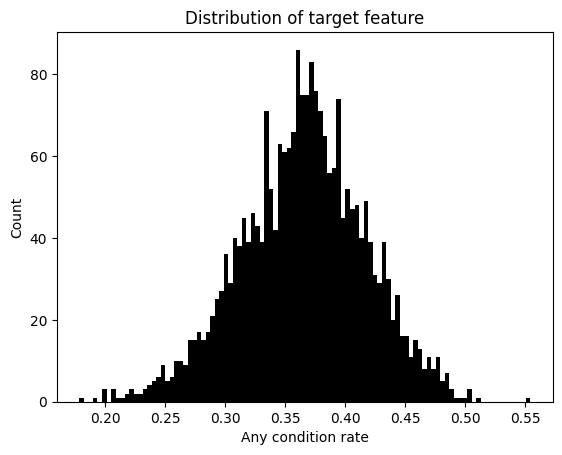

In [21]:
plt.title('Distribution of target feature')
plt.hist(train_labels, color='black', bins=100)
plt.xlabel('Any condition rate')
plt.ylabel('Count')
plt.show()

- Normally distributed target feature!  

In [35]:
#Feature extraction 
feature_columns=list(training_features.columns)
print(feature_columns)
print(len(feature_columns))

['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'Unemployment_rate_2018', 'Primary physicians', 'General surgons']
21


In [36]:
#Row calculation 
rows=len(feature_columns) // 3

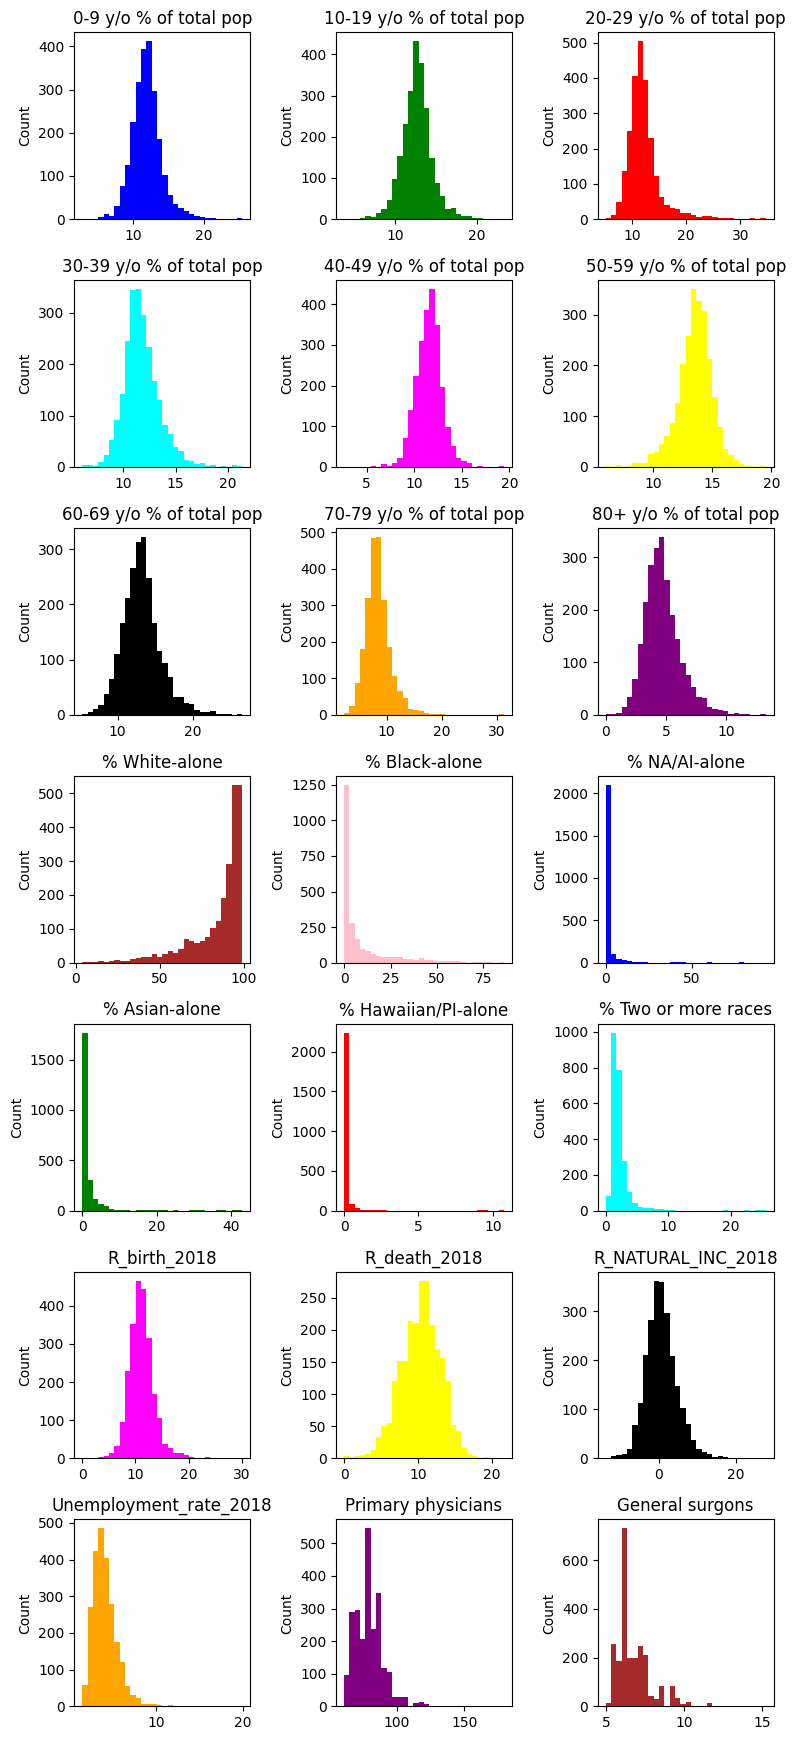

In [40]:
fig, axs=plt.subplots(rows,3, figsize=(8,2.5*rows))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink', 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
for i, feature in enumerate(feature_columns):
    axs[i].set_title(feature)
    axs[i].hist(training_features[feature], color=colors[i % len(colors)], bins=30)
    axs[i].set_ylabel('Count')

fig.tight_layout()
fig.show()

- Most distributions are normally distributed, with few skewed ones! 

#### 2.2.5. Feature interactions (multivariate)

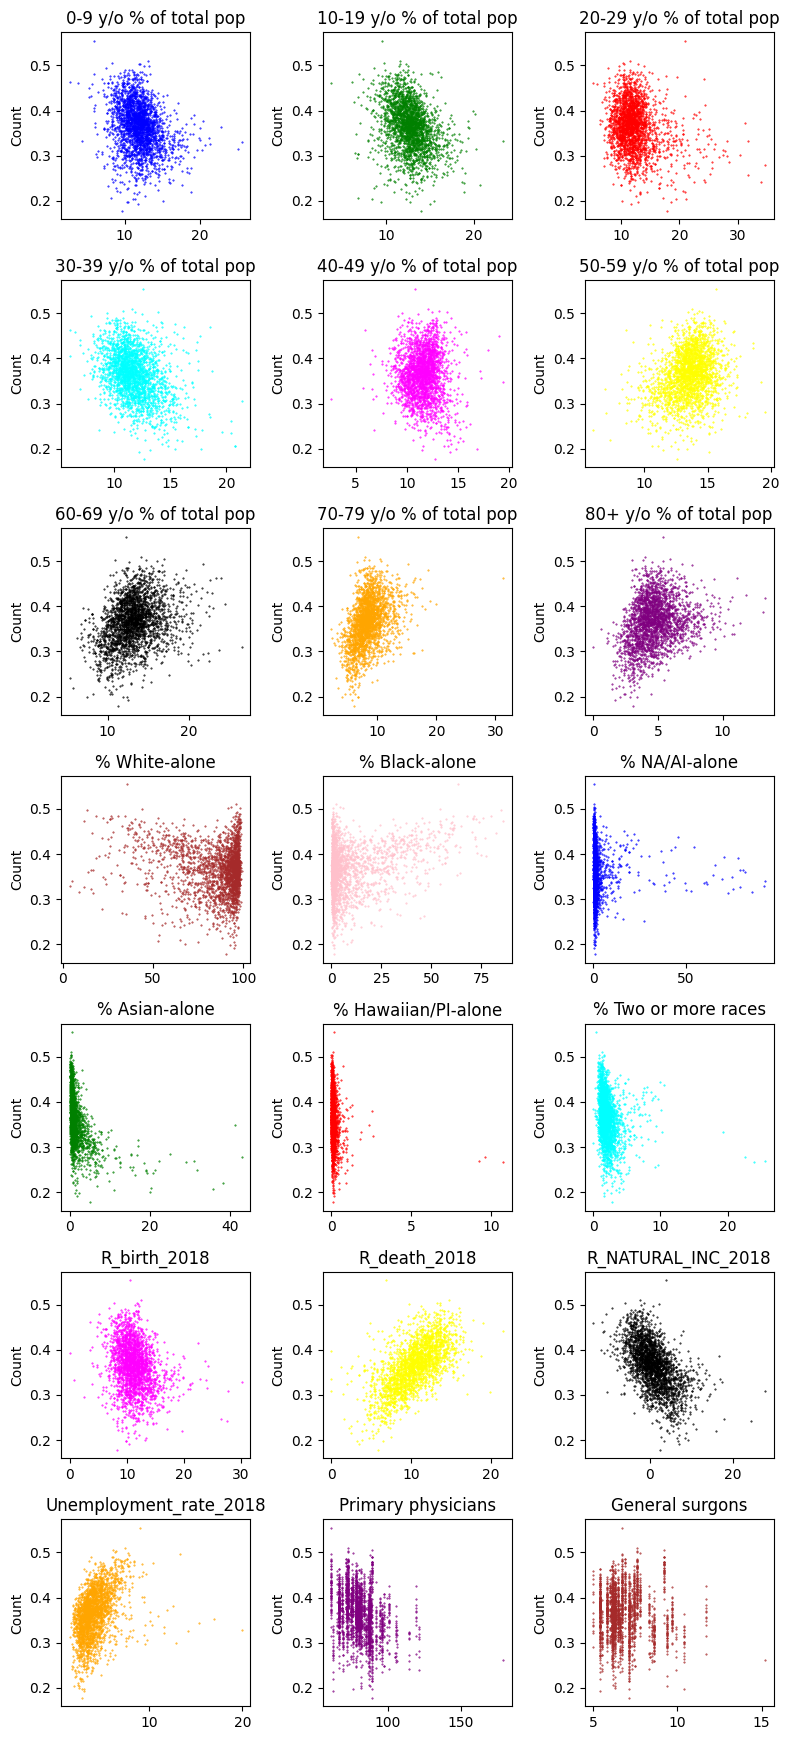

In [42]:
#Feature extraction 
feature_columns=list(training_features.columns)
#Row calculation
rows=len(feature_columns) // 3
#Other features vs target
fig, axs=plt.subplots(rows,3, figsize=(8,2.5*rows))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink', 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']

for i, feature in enumerate(feature_columns):
    axs[i].set_title(feature)
    axs[i].scatter(training_features[feature], train_labels, s=0.2, color=colors[i % len(colors)])
    axs[i].set_ylabel('Count')

fig.tight_layout()
fig.show()